In [1]:
import numpy as np
import random


SOLDIERS = [[[8, 5], 1],
 [[6, 12], 2],
 [[10, 14], 1],
 [[7, 19], 2],
 [[1, 13], 1],
 [[10, 1], 1],
 [[1, 3], 2],
 [[14, 3], 3],
 [[19, 10], 2],
 [[11, 18], 2],
 [[20, 2], 2],
 [[5, 17], 1],
 [[4, 9], 3],
 [[20, 10], 3],
 [[16, 12], 1],
 [[16, 17], 2],
 [[7, 7], 2],
 [[2, 16], 1],
 [[10, 4], 2],
 [[19, 13], 1],
 [[20, 19], 2],
 [[2, 4], 3],
 [[9, 9], 1],
 [[6, 10], 3],
 [[14, 9], 2],
 [[20, 11], 2],
 [[2, 17], 1],
 [[18, 11], 2],
 [[3, 7], 3],
 [[1, 17], 3],
 [[12, 8], 3],
 [[1, 12], 2],
 [[15, 3], 1],
 [[4, 15], 2],
 [[3, 6], 3],
 [[19, 19], 2],
 [[16, 18], 3],
 [[14, 20], 1],
 [[9, 15], 3],
 [[4, 3], 1]]


Horses = [[[5, 16], 9],
 [[3, 19], 9],
 [[2, 14], 9],
 [[4, 12], 9],
 [[12, 16], 9],
 [[7, 11], 9],
 [[20, 6], 9],
 [[8, 16], 9],
 [[11, 15], 9],
 [[3, 17], 9],
 [[13, 2], 9],
 [[2, 12], 9],
 [[18, 8], 9],
 [[12, 14], 9],
 [[15, 15], 9],
 [[16, 20], 9],
 [[19, 12], 9],
 [[6, 2], 9],
 [[10, 2], 9],
 [[15, 12], 9],
 [[14, 8], 9],
 [[13, 19], 9],
 [[7, 3], 9],
 [[19, 18], 9],
 [[9, 8], 9],
 [[16, 10], 9],
 [[12, 2], 9],
 [[3, 20], 9],
 [[19, 17], 9],
 [[5, 9], 9],
 [[3, 11], 9],
 [[13, 20], 9],
 [[20, 14], 9],
 [[11, 11], 9],
 [[1, 16], 9],
 [[11, 1], 9],
 [[13, 3], 9],
 [[11, 16], 9],
 [[20, 18], 9],
 [[1, 20], 9]]

Horses[0][0]

[5, 16]

In [2]:
board_size = 20
n = board_size  # Board size

# Create the empty board
board = [[0 for _ in range(n)] for _ in range(n)]

for i in range(len(SOLDIERS)):
    board[SOLDIERS[i][0][0] - 1][SOLDIERS[i][0][1] - 1] = SOLDIERS[i][1]
    
for i in range(len(Horses)):
    board[Horses[i][0][0] - 1][Horses[i][0][1] - 1] = Horses[i][1]
    
board
print(len(SOLDIERS), len(Horses))

40 40


In [3]:
from PIL import Image, ImageDraw
from IPython.display import display

def generate_chessboard(board):
    # Define the dimensions of the chessboard
    square_size = 100
    board_size = len(board)
    margin = 20
    image_size = (board_size * square_size + 2 * margin, board_size * square_size + 2 * margin)

    # Create a new image with a light gray background
    background_color = "SaddleBrown"
    image = Image.new("RGB", image_size, background_color)
    draw = ImageDraw.Draw(image)

    for row in range(board_size):
        for col in range(board_size):
            x = col * square_size + margin
            y = row * square_size + margin
            piece = board[row][col]

            # Draw the square
            if (row + col) % 2 == 0:
                square_color = "black"  # light gray
            else:
                square_color = "white"  # dark gray
            draw.rectangle([(x, y), (x + square_size, y + square_size)], fill=square_color)

            # Paste the pawn or queen image
            if piece !=0 and piece !=9 :
                pawn_image = Image.open("pawn.png").convert("RGBA").resize((square_size, square_size))
                image.paste(pawn_image, (x, y), mask=pawn_image)
            elif piece == 9:
                queen_image = Image.open("horse.png").convert("RGBA").resize((square_size, square_size))
                image.paste(queen_image, (x, y), mask=queen_image)

    return image


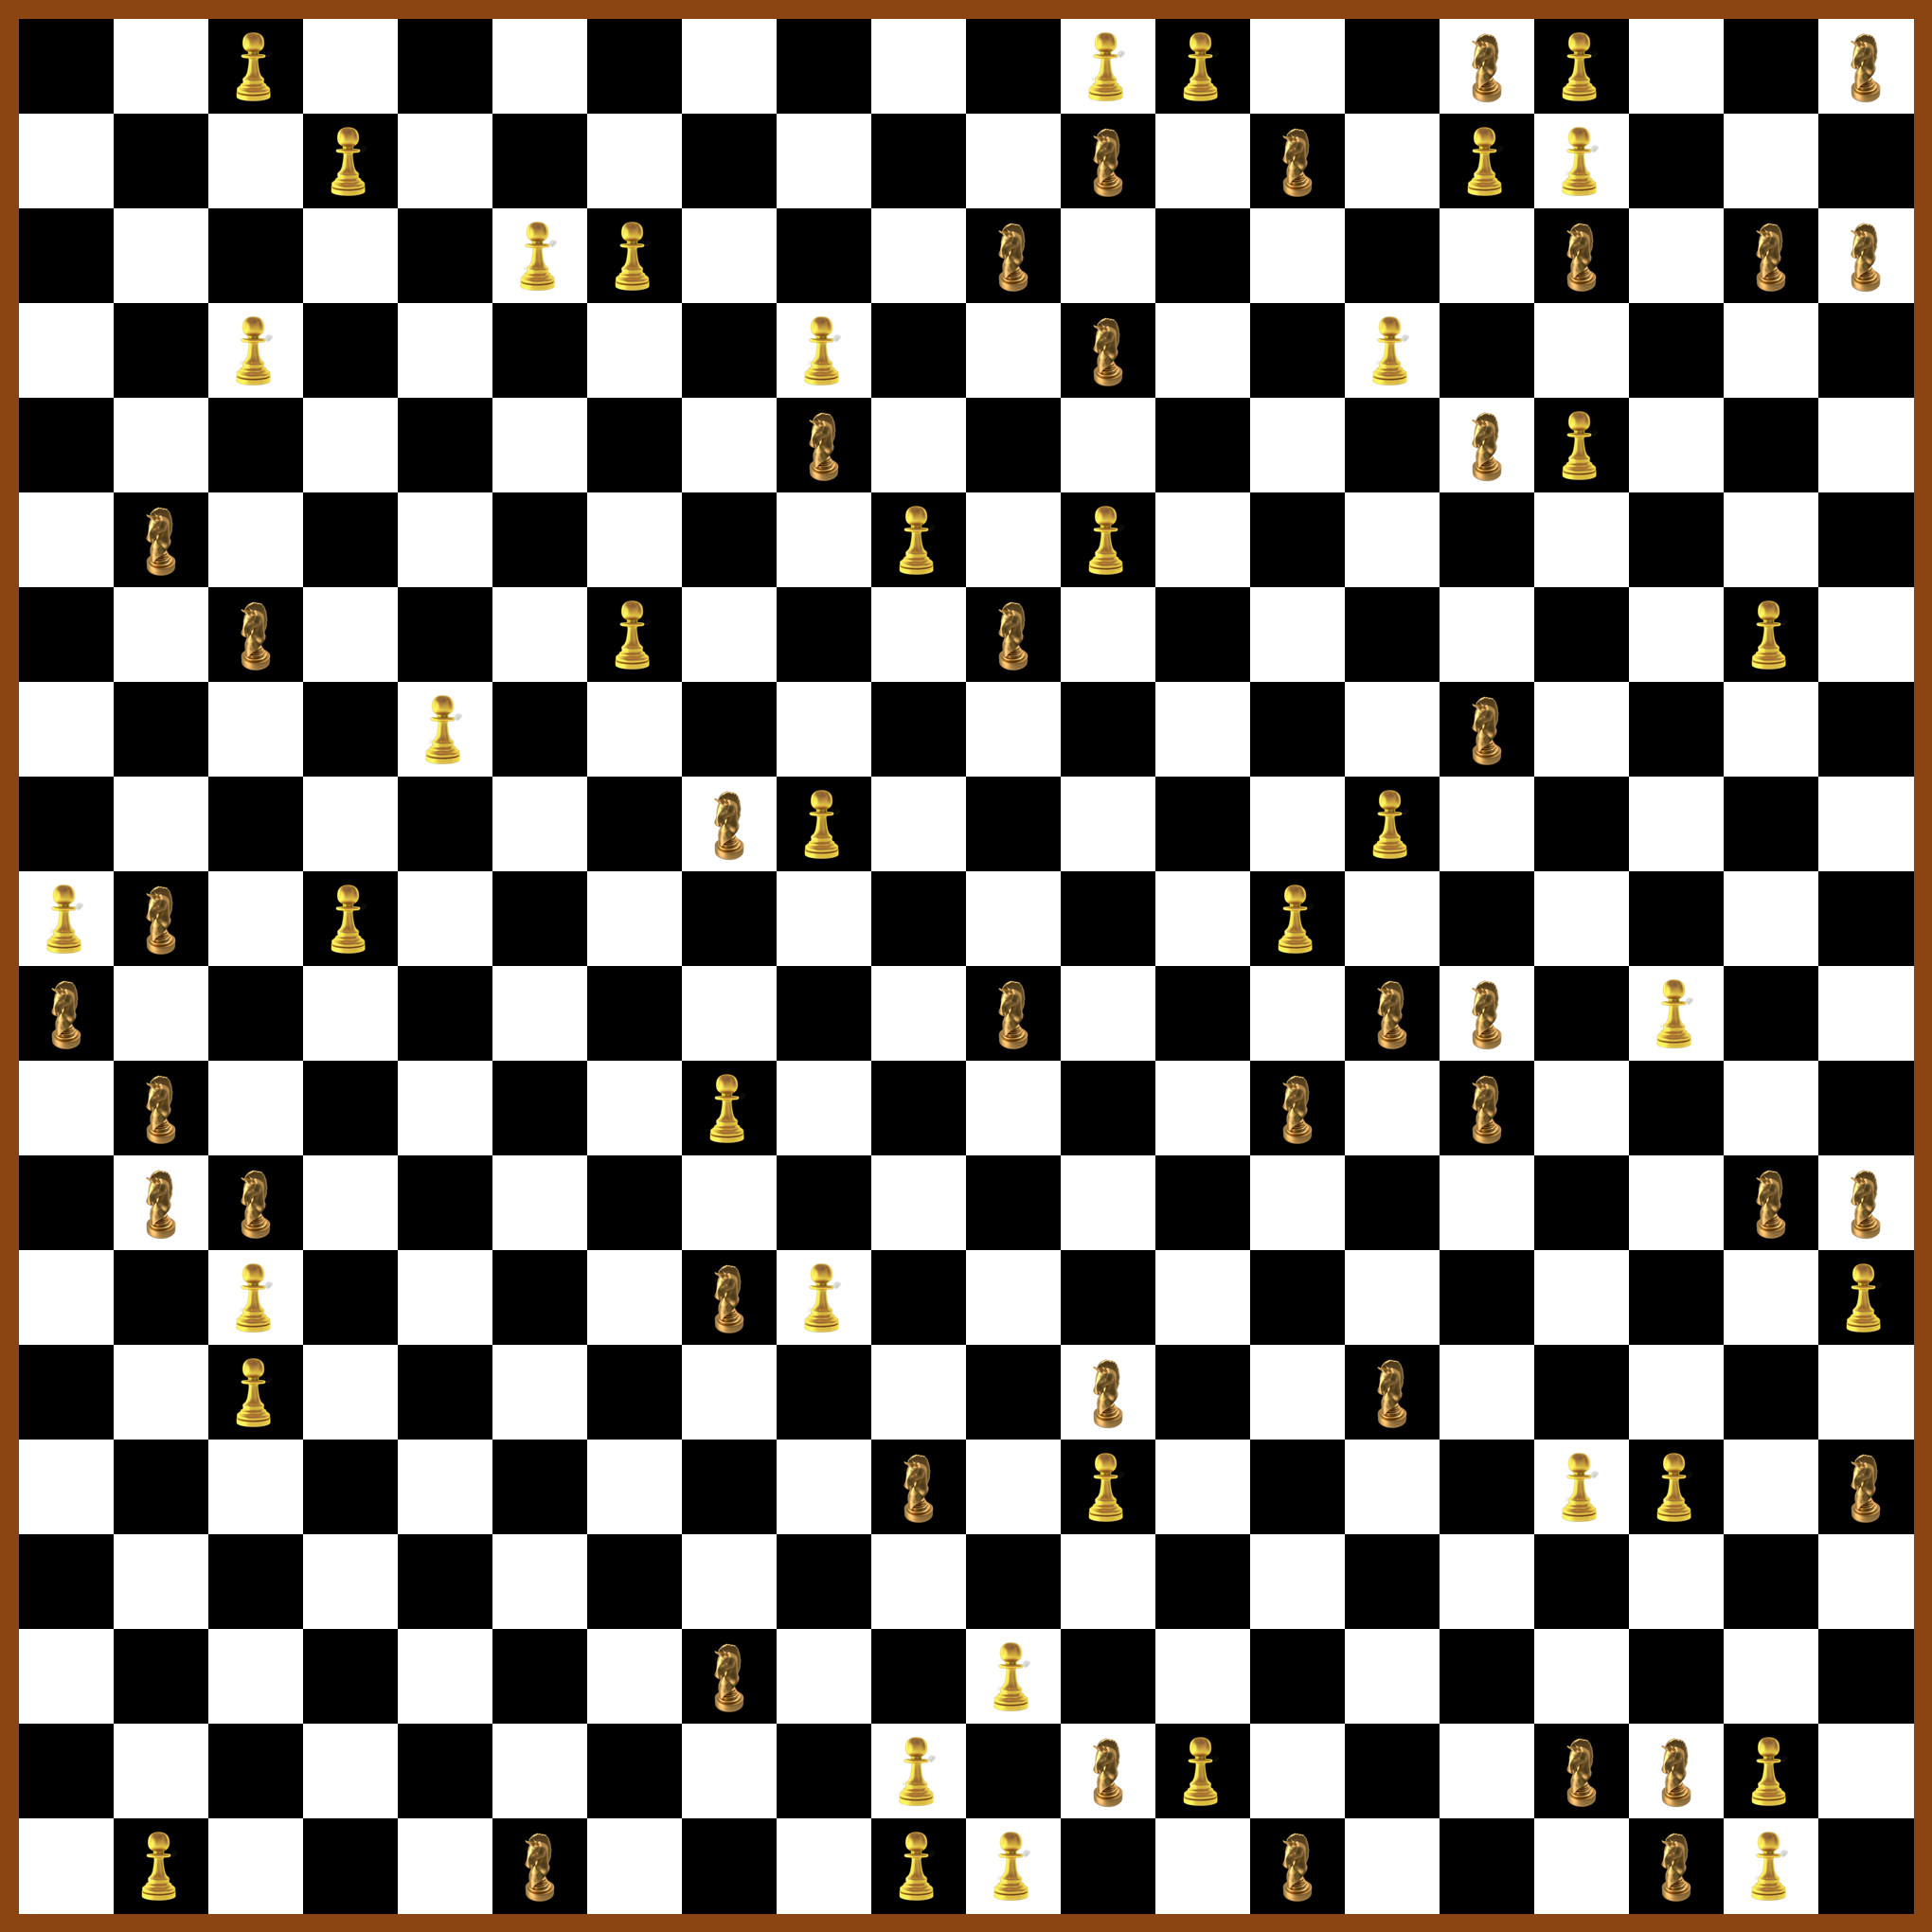

In [4]:
chessboard_image = generate_chessboard(board)
display(chessboard_image)
chessboard_image.save("chessboard_2.png")

In [5]:
def knight_moves():

    # Define the eight possible knight moves relative to the current position
    moves = [(-2, -1), (-2, 1), (-1, -2), (-1, 2), (1, -2), (1, 2), (2, -1), (2, 1), (0,0)]
    return moves

In [6]:
def generate_individual(pop_size, position, board_size, num_moves = 30):
    individuals = []
    
    for i in range(pop_size):
        individual = []
        for i in range(num_moves):
            gene = knight_moves()
            individual.append(random.choice(gene))
        individuals.append(individual)

    return individuals
    



In [7]:
def fitness(SOLDIERS, Horses,individuals):
    
    
    fitness_score = 0
    initial_first_horse = Horses[0][0]
    
    board_size = int(len(SOLDIERS)/2)
    n = board_size
    
    # Create the empty board
    board = [[0 for _ in range(n)] for _ in range(n)]

    for i in range(len(SOLDIERS)):
        board[SOLDIERS[i][0][0] - 1][SOLDIERS[i][0][1] - 1] = SOLDIERS[i][1]

    for i in range(len(Horses)):
        board[Horses[i][0][0] - 1][Horses[i][0][1] - 1] = Horses[i][1]
        
    
    for i in range(len(individuals)):

        old_row, old_col = Horses[0][0]
        add_row, add_col = individuals[i]
        if add_row != 0:
            new_row = old_row + add_row
            new_col = old_col + add_col
            
            if new_row <= board_size and new_col <= board_size and 0 < new_row and 0 < new_col:
                if board[new_row-1][new_col-1] == 0:
                    fitness_score = 0
                    Horses[0][0] = [new_row, new_col]
                    
                
                elif board[new_row-1][new_col-1] == 9:
                    
                    fitness_score = fitness_score - 2
                    Horses[0][0] = [new_row, new_col]
                    
                else:
                    
                    fitness_score = fitness_score + board[new_row-1][new_col-1]
                    Horses[0][0] = [new_row, new_col]
                    
        else:
            break
    Horses[0][0] = initial_first_horse
    return fitness_score



In [8]:
def BestFitness(Soldiers):

    total_score = []
    for i in range(len(Soldiers)):
        pos, score = Soldiers[i]
        total_score.append(score)

    return sum(total_score)

Best_fitness = BestFitness(SOLDIERS)
Best_fitness

78

In [9]:
def crossover(parent1, parent2, crossover_rate = 0.8):
    # Check if crossover should occur based on the crossover rate
    if random.random() < crossover_rate:
        # Choose a random crossover point
        crossover_point = random.randint(1, len(parent1) - 1)

        # Create the first child by combining genes from parent1 and parent2
        child1 = parent1[:crossover_point] + parent2[crossover_point:]

        # Create the second child by combining genes from parent2 and parent1
        child2 = parent2[:crossover_point] + parent1[crossover_point:]
    else:
        # If crossover does not occur, children are identical to parents
        child1 = parent1
        child2 = parent2

    return child1, child2

In [10]:
def mutate(individual, mutation_rate = 0.1):

    # Define the possible moves
    moves = knight_moves()
    
    mutated_individual = individual.copy()
        
    for i in range(len(individual)):
        # Check if mutation should occur based on the mutation rate
        if random.random() < mutation_rate:

            # Generate a new move by randomly selecting from the moves list
            new_move = random.choice(moves)
            
            # Replace the gene in the individual with the new move
            mutated_individual[i] = new_move

    return mutated_individual

In [11]:
# Step 3: Selection
def selection(population, fitness_scores):
    selected_population = []
    
    # Shift fitness scores by a constant factor
    shifted_fitness_scores = [score - min(fitness_scores) + 1 for score in fitness_scores]
    
    total_fitness = sum(shifted_fitness_scores)
    selection_probabilities = [score / total_fitness for score in shifted_fitness_scores]
    
    for _ in range(len(population)):
        selected_individual = random.choices(population, weights=selection_probabilities)[0]
        selected_population.append(selected_individual)

    return selected_population

# 2.a.

Generation 1 - Best Score: 3
Generation 2 - Best Score: 3
Generation 3 - Best Score: 3
Generation 4 - Best Score: 3
Generation 5 - Best Score: 3
Generation 6 - Best Score: 3
Generation 7 - Best Score: 3
Generation 8 - Best Score: 3
Generation 9 - Best Score: 3
Generation 10 - Best Score: 3
Generation 11 - Best Score: 3
Generation 12 - Best Score: 3
Generation 13 - Best Score: 3
Generation 14 - Best Score: 3
Generation 15 - Best Score: 3
Generation 16 - Best Score: 3
Generation 17 - Best Score: 3
Generation 18 - Best Score: 3
Generation 19 - Best Score: 4
Generation 20 - Best Score: 4
Generation 21 - Best Score: 6
Generation 22 - Best Score: 6
Generation 23 - Best Score: 6
Generation 24 - Best Score: 6
Generation 25 - Best Score: 7
Generation 26 - Best Score: 7
Generation 27 - Best Score: 7
Generation 28 - Best Score: 7
Generation 29 - Best Score: 7
Generation 30 - Best Score: 10
Generation 31 - Best Score: 10
Generation 32 - Best Score: 10
Generation 33 - Best Score: 10
Generation 34 -

Generation 264 - Best Score: 30
Generation 265 - Best Score: 30
Generation 266 - Best Score: 30
Generation 267 - Best Score: 30
Generation 268 - Best Score: 30
Generation 269 - Best Score: 30
Generation 270 - Best Score: 30
Generation 271 - Best Score: 30
Generation 272 - Best Score: 30
Generation 273 - Best Score: 30
Generation 274 - Best Score: 30
Generation 275 - Best Score: 30
Generation 276 - Best Score: 30
Generation 277 - Best Score: 30
Generation 278 - Best Score: 30
Generation 279 - Best Score: 30
Generation 280 - Best Score: 30
Generation 281 - Best Score: 30
Generation 282 - Best Score: 30
Generation 283 - Best Score: 30
Generation 284 - Best Score: 30
Generation 285 - Best Score: 30
Generation 286 - Best Score: 30
Generation 287 - Best Score: 30
Generation 288 - Best Score: 30
Generation 289 - Best Score: 30
Generation 290 - Best Score: 30
Generation 291 - Best Score: 30
Generation 292 - Best Score: 30
Generation 293 - Best Score: 30
Generation 294 - Best Score: 30
Generati

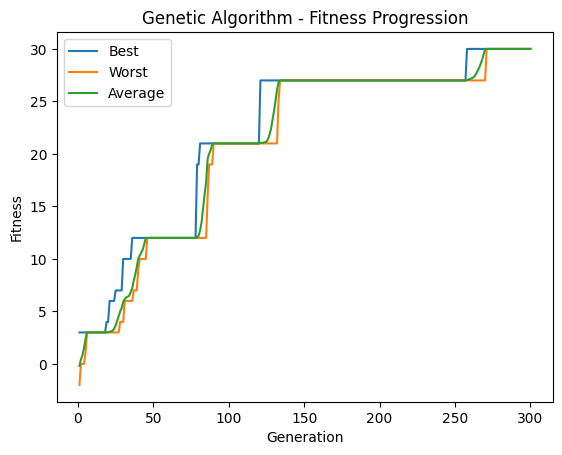

In [12]:
import matplotlib.pyplot as plt

population_size = 100
board_size = 20
num_generations = 300
crossover_rate = 0.9
mutation_rate = 0.1

# Step 1: Initialization
population = generate_individual(population_size, Horses[0][0], board_size=board_size, num_moves=30)

# Lists to store best, worst, and average fitness values
best_fitness_values = []
worst_fitness_values = []
average_fitness_values = []

for generation in range(num_generations):
    # Evaluate population
    scores = [fitness(SOLDIERS, Horses, individual) for individual in population]

    best_score = max(scores)
    worst_score = min(scores)
    average_score = sum(scores) / len(scores)

    # Store fitness values
    best_fitness_values.append(best_score)
    worst_fitness_values.append(worst_score)
    average_fitness_values.append(average_score)

    # Check if best fitness is achieved
    if best_score == BestFitness(SOLDIERS):
        print(f"Generation {generation+1} - Best Score: {best_score}")
        break

    # Print generation information
    print(f"Generation {generation+1} - Best Score: {best_score}")

    # Selection
    parents = selection(population, scores)

    # Shuffle parentsPool
    random.shuffle(parents)

    # Randomly pair solutions
    paired_parents = []
    num_parents = len(parents)
    for i in range(0, num_parents, 2):
        if i + 1 < num_parents:
            paired_parents.append([parents[i], parents[i + 1]])
        else:
            # If the number of parents is odd, handle the last parent separately
            paired_parents.append([parents[i]])

    # Crossover
    offspring = []
    for pair in paired_parents:
        child1, child2 = crossover(pair[0], pair[1], crossover_rate)
        offspring.append(child1)
        offspring.append(child2)

    # Mutation
    for i in range(len(offspring)):
        offspring[i] = mutate(offspring[i], mutation_rate)

    # Evaluate offspring
    offspring_scores = [fitness(SOLDIERS, Horses, individual) for individual in offspring]

    # Combine the population and offspring
    combined_population = population + offspring
    combined_scores = scores + offspring_scores

    # Select the best individuals for the next generation
    sorted_indices = sorted(range(len(combined_scores)), key=lambda k: combined_scores[k], reverse=True)
    population = [combined_population[i] for i in sorted_indices[:population_size]]
    
best_indiv = population[0]

# Print final best score
final_best_score = max(best_fitness_values)
print(f"Final Best Score: {final_best_score}")

# Plotting the evolution graph
generations = range(1, len(best_fitness_values) + 1)

plt.plot(generations, best_fitness_values, label='Best')
plt.plot(generations, worst_fitness_values, label='Worst')
plt.plot(generations, average_fitness_values, label='Average')

plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.title('Genetic Algorithm - Fitness Progression')
plt.legend()

plt.show()

In [13]:
best_indiv

[(-1, -2),
 (-2, -1),
 (1, -2),
 (1, -2),
 (-1, -2),
 (-2, -1),
 (-2, -1),
 (2, 1),
 (1, 2),
 (-1, -2),
 (1, 2),
 (-1, -2),
 (1, 2),
 (-1, -2),
 (1, 2),
 (-1, -2),
 (1, 2),
 (0, 0),
 (1, -2),
 (1, 2),
 (-1, -2),
 (1, 2),
 (1, 2),
 (1, 2),
 (-1, -2),
 (-2, 1),
 (-1, -2),
 (-2, -1),
 (2, -1),
 (0, 0)]

# 2.b.

Run 1 - Generation 300 - Best Score: 31
best solution: [(-2, -1), (-1, -2), (2, -1), (2, -1), (1, 2), (1, 2), (-1, -2), (1, -2), (1, -2), (-2, 1), (-1, -2), (1, 2), (-2, -1), (2, 1), (1, -2), (-2, 1), (-1, -2), (2, 1), (-2, -1), (-2, -1), (-1, -2), (2, -1), (-2, 1), (1, 2), (-1, -2), (1, 2), (-1, -2), (1, 2), (-1, -2), (1, 2)]
Run 2 - Generation 300 - Best Score: 9
best solution: [(1, -2), (-2, 1), (1, 2), (-1, -2), (-2, 1), (2, -1), (1, 2), (0, 0), (2, 1), (1, 2), (2, 1), (2, -1), (-2, 1), (-2, 1), (2, 1), (1, -2), (-2, -1), (-1, -2), (2, 1), (-2, -1), (2, -1), (2, 1), (-2, 1), (1, -2), (2, -1), (2, -1), (0, 0), (1, -2), (2, -1), (-2, 1)]
Run 3 - Generation 300 - Best Score: 15
best solution: [(-1, 2), (-1, -2), (2, 1), (-1, -2), (-2, 1), (2, -1), (1, 2), (-1, -2), (-2, 1), (-2, -1), (-2, -1), (2, -1), (1, 2), (-1, -2), (0, 0), (1, 2), (1, 2), (-1, 2), (-1, -2), (0, 0), (-1, -2), (0, 0), (2, -1), (2, 1), (-2, 1), (1, -2), (-1, 2), (0, 0), (2, 1), (1, 2)]
Run 4 - Generation 300 - Best 

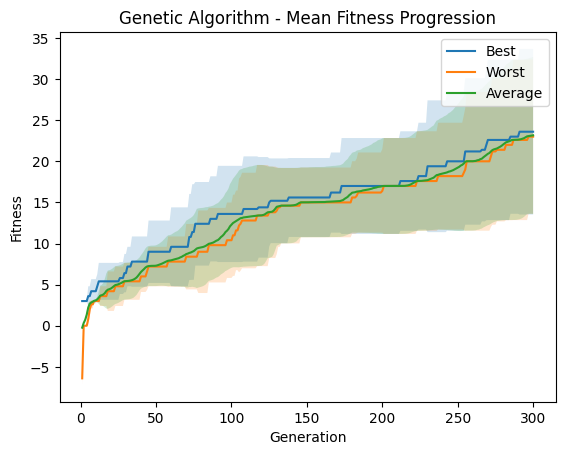

In [14]:
import matplotlib.pyplot as plt
import numpy as np

population_size = 100
board_size = 20
num_generations = 300
crossover_rate = 0.9
mutation_rate = 0.1
num_runs = 5

# Lists to store best, worst, and average fitness values for each run
best_fitness_values_runs = []
worst_fitness_values_runs = []
average_fitness_values_runs = []

for run in range(num_runs):
    # Step 1: Initialization
    population = generate_individual(population_size, Horses[0][0], board_size=board_size, num_moves=30)

    # Lists to store best, worst, and average fitness values
    best_fitness_values = []
    worst_fitness_values = []
    average_fitness_values = []


    for generation in range(num_generations):
        # Evaluate population
        scores = [fitness(SOLDIERS, Horses, individual) for individual in population]

        best_score = max(scores)
        worst_score = min(scores)
        average_score = sum(scores) / len(scores)

        # Store fitness values
        best_fitness_values.append(best_score)
        worst_fitness_values.append(worst_score)
        average_fitness_values.append(average_score)

        # Check if best fitness is achieved
        if best_score == BestFitness(SOLDIERS) or generation ==299:
            print(f"Run {run+1} - Generation {generation+1} - Best Score: {best_score}")
            break


        # Selection
        parents = selection(population, scores)

        # Shuffle parentsPool
        random.shuffle(parents)

        # Randomly pair solutions
        paired_parents = []
        num_parents = len(parents)
        for i in range(0, num_parents, 2):
            if i + 1 < num_parents:
                paired_parents.append([parents[i], parents[i + 1]])
            else:
                # If the number of parents is odd, handle the last parent separately
                paired_parents.append([parents[i]])

        # Crossover
        offspring = []
        for pair in paired_parents:
            child1, child2 = crossover(pair[0], pair[1], crossover_rate)
            offspring.append(child1)
            offspring.append(child2)

        # Mutation
        for i in range(len(offspring)):
            offspring[i] = mutate(offspring[i], mutation_rate)

        # Evaluate offspring
        offspring_scores = [fitness(SOLDIERS, Horses, individual) for individual in offspring]

        # Combine the population and offspring
        combined_population = population + offspring
        combined_scores = scores + offspring_scores

        # Select the best individuals for the next generation
        sorted_indices = sorted(range(len(combined_scores)), key=lambda k: combined_scores[k], reverse=True)
        population = [combined_population[i] for i in sorted_indices[:population_size]]

    best_indiv = population[0]
    print("best solution:", best_indiv)

    # Store the best, worst, and average fitness values for this run
    best_fitness_values_runs.append(best_fitness_values)
    worst_fitness_values_runs.append(worst_fitness_values)
    average_fitness_values_runs.append(average_fitness_values)

# Calculate the mean of the best, worst, and average fitness values across runs
mean_best_fitness_values = np.mean(best_fitness_values_runs, axis=0)
mean_worst_fitness_values = np.mean(worst_fitness_values_runs, axis=0)
mean_average_fitness_values = np.mean(average_fitness_values_runs, axis=0)

# Calculate the standard deviation of the best, worst, and average fitness values across runs
std_best_fitness_values = np.std(best_fitness_values_runs, axis=0)
std_worst_fitness_values = np.std(worst_fitness_values_runs, axis=0)
std_average_fitness_values = np.std(average_fitness_values_runs, axis=0)

# Print final mean best score
final_mean_best_score = np.max(mean_best_fitness_values)
print(f"Final Mean Best Score: {final_mean_best_score}")

# Plotting the mean evolution graph with standard deviation
generations = range(1, len(mean_best_fitness_values) + 1)

plt.plot(generations, mean_best_fitness_values, label='Best')
plt.fill_between(generations, mean_best_fitness_values - std_best_fitness_values, mean_best_fitness_values + std_best_fitness_values, alpha=0.2)

plt.plot(generations, mean_worst_fitness_values, label='Worst')
plt.fill_between(generations, mean_worst_fitness_values - std_worst_fitness_values, mean_worst_fitness_values + std_worst_fitness_values, alpha=0.2)

plt.plot(generations, mean_average_fitness_values, label='Average')
plt.fill_between(generations, mean_average_fitness_values - std_average_fitness_values, mean_average_fitness_values + std_average_fitness_values, alpha=0.2)

plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.title('Genetic Algorithm - Mean Fitness Progression')
plt.legend()

plt.show()

# 2.c.

Best Solution [(1, -2), (1, -2), (-1, -2), (-2, -1), (2, 1), (-2, -1), (2, 1), (-2, -1), (2, 1), (-2, -1), (-1, -2), (1, 2), (2, 1), (-2, -1), (2, 1)]
Run 1 - Generation 300 - moves: 15 - Best Score: 39
Best Solution [(1, -2), (1, -2), (-1, -2), (-2, -1), (2, 1), (-2, -1), (-1, -2), (1, 2), (-1, -2), (1, 2), (-1, -2), (1, 2), (-1, -2), (1, 2), (2, 1)]
Run 2 - Generation 300 - moves: 15 - Best Score: 39
Best Solution [(1, -2), (-2, 1), (1, 2), (-1, -2), (1, 2), (-1, -2), (1, 2), (-1, -2), (-2, 1), (2, -1), (1, 2), (-1, -2), (1, 2), (-1, -2), (-2, 1)]
Run 3 - Generation 300 - moves: 15 - Best Score: 21
Best Solution [(2, 1), (-2, -1), (-1, -2), (-1, -2), (2, -1), (-1, -2), (-1, -2), (1, 2), (2, 1), (-2, -1), (-1, -2), (1, 2), (-1, -2), (1, 2), (-1, -2)]
Run 4 - Generation 300 - moves: 15 - Best Score: 30
Best Solution [(-1, -2), (-2, 1), (-2, 1), (-1, 2), (2, -1), (2, 1), (-1, -2), (1, 2), (-1, -2), (1, 2), (-1, -2), (-2, 1), (2, -1), (1, 2), (-1, -2)]
Run 5 - Generation 300 - moves: 15 

Best Solution [(1, -2), (-1, -2), (1, -2), (-2, -1), (-2, 1), (2, -1), (-1, -2), (-2, -1), (1, -2), (1, 2), (-1, -2), (1, 2), (-1, -2), (1, 2), (-1, -2), (-2, 1), (1, 2), (-1, -2), (1, 2), (-1, -2), (1, 2), (-1, -2), (0, 0), (-1, 2), (0, 0), (1, 2), (0, 0), (-2, 1), (2, -1), (-1, 2), (-2, -1), (2, 1), (1, -2), (2, -1), (1, 2), (0, 0), (-2, -1), (-2, 1), (2, -1), (-1, -2)]
Run 4 - Generation 300 - moves: 40 - Best Score: 39
Best Solution [(2, -1), (-2, -1), (1, -2), (2, -1), (-2, -1), (-2, -1), (2, 1), (-2, -1), (2, 1), (-2, -1), (-1, -2), (1, 2), (2, 1), (-2, -1), (-1, -2), (1, 2), (2, 1), (-2, -1), (0, 0), (2, 1), (1, 2), (2, -1), (2, -1), (-1, -2), (-2, 1), (0, 0), (2, 1), (0, 0), (0, 0), (2, -1), (-2, 1), (-1, 2), (-2, 1), (0, 0), (-2, -1), (1, 2), (-2, -1), (2, -1), (1, -2), (2, 1)]
Run 5 - Generation 300 - moves: 40 - Best Score: 42


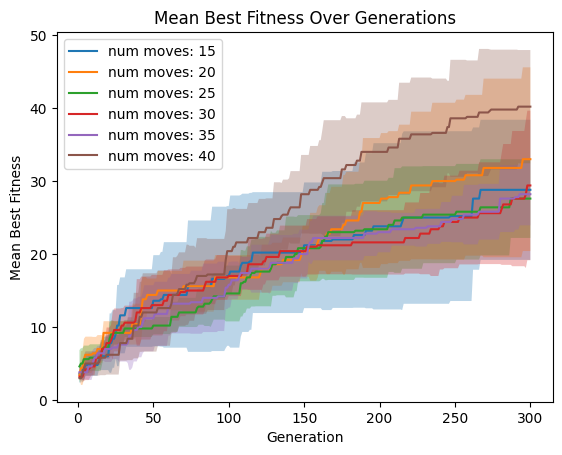

In [15]:
population_sizes = 100
board_size = 20
num_generations = 300
crossover_rate = 0.9
mutation_rate = 0.1
num_runs = 5
num_moves = [15,20,25,30,35,40]

# Define lists to store the results for each population size
mean_best_fitness_values = []
std_best_fitness_values = []

# Define colors for each population size
colors = ['blue', 'orange', 'green', 'red']

# Loop over population sizes
for i, num_move in enumerate(num_moves):
    best_fitness_runs = []
    
    # Loop over runs
    for run in range(num_runs):
        best_fitness = []
        
        # Step 1: Initialization
        population = generate_individual(population_size, Horses[0][0], board_size=board_size, num_moves=num_move)  # TODO: Implement generate_individual function
        
        best_fitness_values = []
        worst_fitness_values = []
        average_fitness_values = []
        
        for generation in range(num_generations):
            scores = [fitness(SOLDIERS, Horses, individual) for individual in population]  # TODO: Implement fitness function
            
            best_score = max(scores)
            worst_score = min(scores)
            average_score = sum(scores) / len(scores)
            
            best_fitness_values.append(best_score)
            worst_fitness_values.append(worst_score)
            average_fitness_values.append(average_score)
            
            if best_score == BestFitness(SOLDIERS) or generation == 299:
                print("Best Solution",population[0])
                print(f"Run {run+1} - Generation {generation+1} - moves: {num_move} - Best Score: {best_score}")
                break
            
            parents = selection(population, scores)  # TODO: Implement selection function
            
            random.shuffle(parents)
            
            paired_parents = []
            num_parents = len(parents)
            for i in range(0, num_parents, 2):
                if i + 1 < num_parents:
                    paired_parents.append([parents[i], parents[i + 1]])
                else:
                    paired_parents.append([parents[i]])
            
            offspring = []
            for pair in paired_parents:
                child1, child2 = crossover(pair[0], pair[1], crossover_rate)  # TODO: Implement crossover function
                offspring.append(child1)
                offspring.append(child2)
            
            for i in range(len(offspring)):
                offspring[i] = mutate(offspring[i], mutation_rate)  # TODO: Implement mutate function
            
            offspring_scores = [fitness(SOLDIERS, Horses, individual) for individual in offspring]  # TODO: Implement fitness function
            
            combined_population = population + offspring
            combined_scores = scores + offspring_scores
            
            sorted_indices = sorted(range(len(combined_scores)), key=lambda k: combined_scores[k], reverse=True)
            population = [combined_population[i] for i in sorted_indices[:population_size]]
            
            best_fitness.append(fitness(SOLDIERS, Horses, population[0]))  # TODO: Implement fitness function
        
        best_fitness.append(fitness(SOLDIERS, Horses, population[0]))  # TODO: Implement fitness function
        
        best_fitness_runs.append(best_fitness)
    

    best_fitness_runs = np.array(best_fitness_runs)
    
    # Calculate the mean and standard deviation over runs for the current population size
    mean_best_fitness = np.mean(best_fitness_runs, axis=0)
    std_best_fitness = np.std(best_fitness_runs, axis=0)
    
    mean_best_fitness_values.append(mean_best_fitness)
    std_best_fitness_values.append(std_best_fitness)

# Plot the mean fitness and standard deviation over generations for each population size
generations = range(1, num_generations + 1)

for i, num_move in enumerate(num_moves):
    mean_best_fitness = mean_best_fitness_values[i]
    std_best_fitness = std_best_fitness_values[i]

    plt.plot(generations, mean_best_fitness, label=f'num moves: {num_move}')
    plt.fill_between(generations, mean_best_fitness - std_best_fitness, mean_best_fitness + std_best_fitness, alpha=0.3)

plt.xlabel('Generation')
plt.ylabel('Mean Best Fitness')
plt.title('Mean Best Fitness Over Generations')
plt.legend()
plt.show()



# 2.d.

Best Solution [(2, -1), (-1, -2), (-1, -2), (-2, 1), (2, -1), (-1, -2), (1, 2), (-1, -2), (-1, -2), (1, 2), (2, 1), (-2, -1), (2, 1), (-2, -1), (2, 1), (-2, -1), (2, 1), (-2, -1), (-1, -2), (0, 0), (1, 2), (-2, 1), (-1, 2), (2, 1), (-2, 1), (2, -1), (-2, -1), (0, 0), (-2, 1), (-1, 2)]
Run 1 - Generation 300 - Population Size: 50 - Best Score: 36
Best Solution [(1, -2), (2, 1), (-1, 2), (-1, 2), (-2, -1), (1, -2), (-1, -2), (-1, -2), (-1, -2), (2, 1), (-2, -1), (2, -1), (-1, -2), (2, 1), (-2, 1), (2, 1), (-2, -1), (1, 2), (-2, -1), (2, -1), (2, 1), (-2, -1), (0, 0), (-1, -2), (-2, -1), (1, 2), (-1, 2), (1, 2), (-1, 2), (-1, 2)]
Run 2 - Generation 300 - Population Size: 50 - Best Score: 9
Best Solution [(1, 2), (1, -2), (1, -2), (1, 2), (-1, -2), (2, -1), (-1, 2), (1, -2), (1, 2), (1, -2), (-1, 2), (2, 1), (2, -1), (-1, -2), (2, -1), (2, -1), (2, -1), (1, 2), (1, 2), (1, 2), (2, -1), (2, -1), (-2, 1), (2, -1), (-2, 1), (2, -1), (-2, 1), (-2, 1), (2, -1), (2, -1)]
Run 3 - Generation 300 -

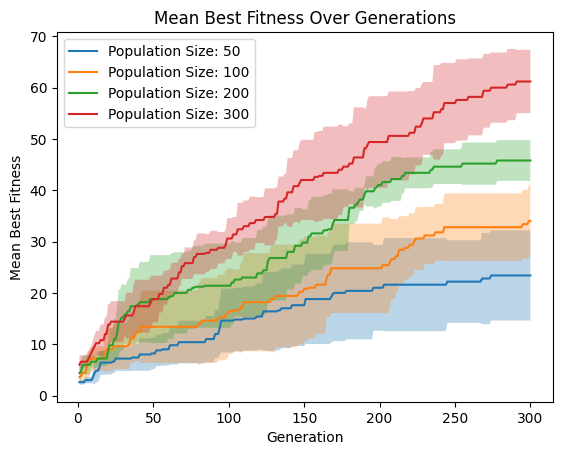

In [16]:
import matplotlib.pyplot as plt
import numpy as np

population_sizes = [50, 100, 200, 300]
board_size = 20
num_generations = 300
crossover_rate = 0.9
mutation_rate = 0.1
num_runs = 5

# Define lists to store the results for each population size
mean_best_fitness_values = []
std_best_fitness_values = []

# Define colors for each population size
colors = ['blue', 'orange', 'green', 'red']

# Loop over population sizes
for i, population_size in enumerate(population_sizes):
    best_fitness_runs = []
    
    # Loop over runs
    for run in range(num_runs):
        best_fitness = []
        
        # Step 1: Initialization
        population = generate_individual(population_size, Horses[0][0], board_size=board_size, num_moves=30)  # TODO: Implement generate_individual function
        
        best_fitness_values = []
        worst_fitness_values = []
        average_fitness_values = []
        
        for generation in range(num_generations):
            scores = [fitness(SOLDIERS, Horses, individual) for individual in population]  # TODO: Implement fitness function
            
            best_score = max(scores)
            worst_score = min(scores)
            average_score = sum(scores) / len(scores)
            
            best_fitness_values.append(best_score)
            worst_fitness_values.append(worst_score)
            average_fitness_values.append(average_score)
            
            if best_score == BestFitness(SOLDIERS) or generation == 299:
                print("Best Solution",population[0])
                print(f"Run {run+1} - Generation {generation+1} - Population Size: {population_size} - Best Score: {best_score}")
                break
            
            parents = selection(population, scores)  # TODO: Implement selection function
            
            random.shuffle(parents)
            
            paired_parents = []
            num_parents = len(parents)
            for i in range(0, num_parents, 2):
                if i + 1 < num_parents:
                    paired_parents.append([parents[i], parents[i + 1]])
                else:
                    paired_parents.append([parents[i]])
            
            offspring = []
            for pair in paired_parents:
                child1, child2 = crossover(pair[0], pair[1], crossover_rate)  # TODO: Implement crossover function
                offspring.append(child1)
                offspring.append(child2)
            
            for i in range(len(offspring)):
                offspring[i] = mutate(offspring[i], mutation_rate)  # TODO: Implement mutate function
            
            offspring_scores = [fitness(SOLDIERS, Horses, individual) for individual in offspring]  # TODO: Implement fitness function
            
            combined_population = population + offspring
            combined_scores = scores + offspring_scores
            
            sorted_indices = sorted(range(len(combined_scores)), key=lambda k: combined_scores[k], reverse=True)
            population = [combined_population[i] for i in sorted_indices[:population_size]]
            
            best_fitness.append(fitness(SOLDIERS, Horses, population[0]))  # TODO: Implement fitness function
        
        best_fitness.append(fitness(SOLDIERS, Horses, population[0]))  # TODO: Implement fitness function
        
        best_fitness_runs.append(best_fitness)
    

    best_fitness_runs = np.array(best_fitness_runs)
    
    # Calculate the mean and standard deviation over runs for the current population size
    mean_best_fitness = np.mean(best_fitness_runs, axis=0)
    std_best_fitness = np.std(best_fitness_runs, axis=0)
    
    mean_best_fitness_values.append(mean_best_fitness)
    std_best_fitness_values.append(std_best_fitness)

# Plot the mean fitness and standard deviation over generations for each population size
generations = range(1, num_generations + 1)

for i, population_size in enumerate(population_sizes):
    mean_best_fitness = mean_best_fitness_values[i]
    std_best_fitness = std_best_fitness_values[i]

    plt.plot(generations, mean_best_fitness, label=f'Population Size: {population_size}')
    plt.fill_between(generations, mean_best_fitness - std_best_fitness, mean_best_fitness + std_best_fitness, alpha=0.3)

plt.xlabel('Generation')
plt.ylabel('Mean Best Fitness')
plt.title('Mean Best Fitness Over Generations')
plt.legend()
plt.show()




# 2.e.

Best Solution [(-2, 1), (-1, 2), (-2, 1), (-1, -2), (-2, 1), (2, -1), (1, 2), (1, 2), (-2, -1), (1, -2), (-2, -1), (2, -1), (-2, 1), (2, -1), (-2, 1), (-2, -1), (2, -1), (1, 2), (-1, -2), (-2, 1), (2, -1), (-2, 1), (-2, -1), (2, -1), (-2, 1), (2, -1), (-2, 1), (2, -1), (-2, 1), (2, -1)]
Run 1 - Generation 300 - Crossover Rate: 0.5 - Best Score: 27
Best Solution [(-1, -2), (-1, 2), (2, 1), (-1, -2), (-2, 1), (2, -1), (-2, 1), (2, -1), (1, 2), (-1, -2), (-2, 1), (2, -1), (-2, 1), (2, -1), (0, 0), (-2, -1), (-2, -1), (1, 2), (2, -1), (-1, 2), (2, 1), (0, 0), (0, 0), (2, 1), (-1, 2), (2, -1), (1, -2), (2, -1), (1, -2), (1, -2)]
Run 2 - Generation 300 - Crossover Rate: 0.5 - Best Score: 18
Best Solution [(2, -1), (-1, -2), (-2, 1), (2, -1), (-1, -2), (-1, -2), (2, 1), (-2, -1), (2, 1), (-2, -1), (-1, -2), (1, 2), (2, 1), (-2, -1), (2, 1), (-2, -1), (-1, -2), (1, 2), (-1, 2), (-2, 1), (-2, 1), (0, 0), (-2, -1), (-2, 1), (-1, -2), (-2, -1), (1, 2), (-2, -1), (-2, 1), (-1, 2)]
Run 3 - Generati

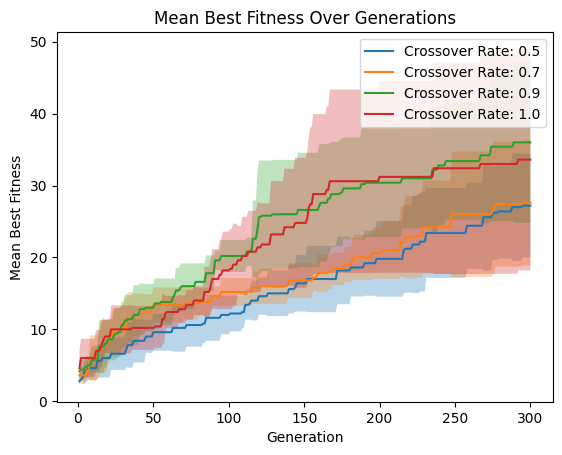

In [17]:
import matplotlib.pyplot as plt
import numpy as np

population_size = 100
board_size = 20
num_generations = 300
crossover_rates = [0.5, 0.7, 0.9, 1.0]  # Updated crossover rates
mutation_rate = 0.1
num_runs = 5

# Define lists to store the results for each crossover rate
mean_best_fitness_values = []
std_best_fitness_values = []

# Define colors for each crossover rate
colors = ['blue', 'orange', 'green', 'red']

# Loop over crossover rates
for i, crossover_rate in enumerate(crossover_rates):
    best_fitness_runs = []
    
    # Loop over runs
    for run in range(num_runs):
        best_fitness = []
        
        # Step 1: Initialization
        population = generate_individual(population_size, Horses[0][0], board_size=board_size, num_moves=30)  # TODO: Implement generate_individual function
        
        best_fitness_values = []
        worst_fitness_values = []
        average_fitness_values = []
        
        for generation in range(num_generations):
            scores = [fitness(SOLDIERS, Horses, individual) for individual in population]  # TODO: Implement fitness function
            
            best_score = max(scores)
            worst_score = min(scores)
            average_score = sum(scores) / len(scores)
            
            best_fitness_values.append(best_score)
            worst_fitness_values.append(worst_score)
            average_fitness_values.append(average_score)
            
            if best_score == BestFitness(SOLDIERS) or generation == 299:
                print("Best Solution",population[0])
                print(f"Run {run+1} - Generation {generation+1} - Crossover Rate: {crossover_rate} - Best Score: {best_score}")
                break
            
            parents = selection(population, scores)  # TODO: Implement selection function
            
            random.shuffle(parents)
            
            paired_parents = []
            num_parents = len(parents)
            for i in range(0, num_parents, 2):
                if i + 1 < num_parents:
                    paired_parents.append([parents[i], parents[i + 1]])
                else:
                    paired_parents.append([parents[i]])
            
            offspring = []
            for pair in paired_parents:
                child1, child2 = crossover(pair[0], pair[1], crossover_rate)  # TODO: Implement crossover function
                offspring.append(child1)
                offspring.append(child2)
            
            for i in range(len(offspring)):
                offspring[i] = mutate(offspring[i], mutation_rate)  # TODO: Implement mutate function
            
            offspring_scores = [fitness(SOLDIERS, Horses, individual) for individual in offspring]  # TODO: Implement fitness function
            
            combined_population = population + offspring
            combined_scores = scores + offspring_scores
            
            sorted_indices = sorted(range(len(combined_scores)), key=lambda k: combined_scores[k], reverse=True)
            population = [combined_population[i] for i in sorted_indices[:population_size]]
            
            best_fitness.append(fitness(SOLDIERS, Horses, population[0]))  # TODO: Implement fitness function
        
        best_fitness.append(fitness(SOLDIERS, Horses, population[0]))  # TODO: Implement fitness function
        
        best_fitness_runs.append(best_fitness)
    

    best_fitness_runs = np.array(best_fitness_runs)
    
    # Calculate the mean and standard deviation over runs for the current crossover rate
    mean_best_fitness = np.mean(best_fitness_runs, axis=0)
    std_best_fitness = np.std(best_fitness_runs, axis=0)
    
    mean_best_fitness_values.append(mean_best_fitness)
    std_best_fitness_values.append(std_best_fitness)

# Plot the mean fitness and standard deviation over generations for each crossover rate
generations = range(1, num_generations + 1)

for i, crossover_rate in enumerate(crossover_rates):
    mean_best_fitness = mean_best_fitness_values[i]
    std_best_fitness = std_best_fitness_values[i]

    plt.plot(generations, mean_best_fitness, label=f'Crossover Rate: {crossover_rate}')
    plt.fill_between(generations, mean_best_fitness - std_best_fitness, mean_best_fitness + std_best_fitness, alpha=0.3)

plt.xlabel('Generation')
plt.ylabel('Mean Best Fitness')
plt.title('Mean Best Fitness Over Generations')
plt.legend()
plt.show()





# 2.f.

Best Solution [(-2, -1), (-2, -1), (1, -2), (-2, -1), (2, -1), (-2, -1), (1, -2), (-2, -1), (-1, -2), (2, 1), (-2, -1), (-2, -1), (2, -1), (-2, -1), (2, 1), (2, 1), (-2, -1), (-1, -2), (-2, 1), (1, 2), (-1, -2), (1, 2), (-1, -2), (-2, 1), (1, 2), (-1, -2), (1, 2), (-1, -2), (1, 2), (-1, -2)]
Run 1 - Generation 300 - Mutation Rate: 0.05 - Best Score: 36
Best Solution [(-1, -2), (1, -2), (-2, -1), (1, -2), (-1, 2), (2, 1), (1, -2), (-2, -1), (2, 1), (-2, -1), (-1, -2), (1, 2), (2, 1), (-2, -1), (-1, -2), (1, 2), (2, 1), (-2, -1), (-1, -2), (0, 0), (-2, -1), (-2, -1), (1, -2), (1, -2), (2, 1), (-2, -1), (1, 2), (1, -2), (-1, 2), (-2, 1)]
Run 2 - Generation 300 - Mutation Rate: 0.05 - Best Score: 39
Best Solution [(2, 1), (2, -1), (-2, 1), (-1, 2), (-2, -1), (2, -1), (-2, -1), (-1, -2), (-1, -2), (2, -1), (-2, -1), (-2, -1), (2, -1), (2, 1), (-2, -1), (2, 1), (-2, -1), (2, 1), (-2, -1), (-1, -2), (1, 2), (-1, 2), (1, -2), (-1, -2), (0, 0), (-2, 1), (-1, -2), (1, 2), (1, -2), (-1, 2)]
Run 3

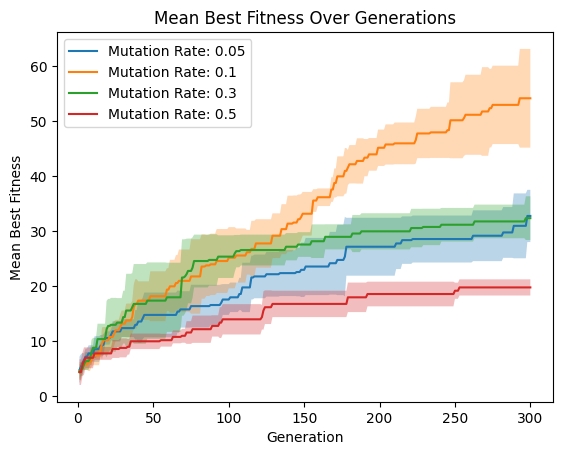

In [18]:
import matplotlib.pyplot as plt
import numpy as np

population_size = 200
board_size = 20
num_generations = 300
mutation_rates = [0.05, 0.1, 0.3, 0.5]
crossover_rate = 0.9
num_runs = 5

# Define lists to store the results for each mutation rate
mean_best_fitness_values = []
std_best_fitness_values = []

# Define colors for each mutation rate
colors = ['blue', 'orange', 'green', 'red']

# Loop over mutation rates
for i, mutation_rate in enumerate(mutation_rates):
    best_fitness_runs = []

    # Loop over runs
    for run in range(num_runs):
        best_fitness = []

        # Step 1: Initialization
        population = generate_individual(population_size, Horses[0][0], board_size=board_size, num_moves=30)  # TODO: Implement generate_individual function

        best_fitness_values = []
        worst_fitness_values = []
        average_fitness_values = []

        for generation in range(num_generations):
            scores = [fitness(SOLDIERS, Horses, individual) for individual in population]  # TODO: Implement fitness function

            best_score = max(scores)
            worst_score = min(scores)
            average_score = sum(scores) / len(scores)

            best_fitness_values.append(best_score)
            worst_fitness_values.append(worst_score)
            average_fitness_values.append(average_score)

            if best_score == BestFitness(SOLDIERS) or generation == 299:
                print("Best Solution", population[0])
                print(f"Run {run+1} - Generation {generation+1} - Mutation Rate: {mutation_rate} - Best Score: {best_score}")
                break

            parents = selection(population, scores)  # TODO: Implement selection function

            random.shuffle(parents)

            paired_parents = []
            num_parents = len(parents)
            for i in range(0, num_parents, 2):
                if i + 1 < num_parents:
                    paired_parents.append([parents[i], parents[i + 1]])
                else:
                    paired_parents.append([parents[i]])

            offspring = []
            for pair in paired_parents:
                child1, child2 = crossover(pair[0], pair[1], crossover_rate)  # TODO: Implement crossover function
                offspring.append(child1)
                offspring.append(child2)

            for i in range(len(offspring)):
                offspring[i] = mutate(offspring[i], mutation_rate)  # TODO: Implement mutate function

            offspring_scores = [fitness(SOLDIERS, Horses, individual) for individual in offspring]  # TODO: Implement fitness function

            combined_population = population + offspring
            combined_scores = scores + offspring_scores

            sorted_indices = sorted(range(len(combined_scores)), key=lambda k: combined_scores[k], reverse=True)
            population = [combined_population[i] for i in sorted_indices[:population_size]]

            best_fitness.append(fitness(SOLDIERS, Horses, population[0]))  # TODO: Implement fitness function

        best_fitness.append(fitness(SOLDIERS, Horses, population[0]))  # TODO: Implement fitness function

        best_fitness_runs.append(best_fitness)

    best_fitness_runs = np.array(best_fitness_runs)

    # Calculate the mean and standard deviation over runs for the current mutation rate
    mean_best_fitness = np.mean(best_fitness_runs, axis=0)
    std_best_fitness = np.std(best_fitness_runs, axis=0)

    mean_best_fitness_values.append(mean_best_fitness)
    std_best_fitness_values.append(std_best_fitness)

# Plot the mean fitness and standard deviation over generations for each mutation rate
generations = range(1, num_generations + 1)

for i, mutation_rate in enumerate(mutation_rates):
    mean_best_fitness = mean_best_fitness_values[i]
    std_best_fitness = std_best_fitness_values[i]

    plt.plot(generations, mean_best_fitness, label=f'Mutation Rate: {mutation_rate}')
    plt.fill_between(generations, mean_best_fitness - std_best_fitness, mean_best_fitness + std_best_fitness, alpha=0.3)

plt.xlabel('Generation')
plt.ylabel('Mean Best Fitness')
plt.title('Mean Best Fitness Over Generations')
plt.legend()
plt.show()


# 2.g.

# I just gave the best solution in the code to each parts

# 2.h.

# Its Optionsl

In [19]:
def selection(population):
    selected = []
    while len(selected) < len(population):
        # Randomly select two individuals from the population
        individual1 = random.choice(population)
        individual2 = random.choice(population)
        
        # Compare their fitness values
        fitness1 = fitness(SOLDIERS, Horses, individual1)
        fitness2 = fitness(SOLDIERS, Horses, individual2)
        
        # Select the individual with the higher fitness value
        if fitness1 > fitness2:
            selected.append(individual1)
        else:
            selected.append(individual2)
    return selected

# 2.h. for jim

Best Solution [(1, -2), (-1, -2), (1, -2), (-2, -1), (2, 1), (-2, -1), (-1, -2), (1, 2), (-1, -2), (1, 2), (-1, -2), (1, 2), (-1, -2), (1, 2), (2, 1)]
Run 1 - Generation 300 - moves: 15 - Best Score: 39
Best Solution [(1, -2), (-2, 1), (-2, 1), (2, -1), (-2, 1), (-2, -1), (2, -1), (-2, 1), (2, -1), (1, 2), (-1, -2), (1, 2), (-1, -2), (1, 2), (-1, -2)]
Run 2 - Generation 300 - moves: 15 - Best Score: 20
Best Solution [(-1, -2), (-2, -1), (-2, -1), (1, -2), (1, -2), (-1, -2), (1, 2), (-1, -2), (1, 2), (-1, -2), (1, 2), (-1, -2), (1, 2), (-1, -2), (1, 2)]
Run 3 - Generation 300 - moves: 15 - Best Score: 31
Best Solution [(1, -2), (-2, -1), (-2, 1), (1, -2), (2, 1), (-1, -2), (2, 1), (-2, -1), (2, -1), (-2, -1), (-1, -2), (1, 2), (2, 1), (-2, -1), (2, 1)]
Run 4 - Generation 300 - moves: 15 - Best Score: 21
Best Solution [(1, -2), (1, -2), (-2, -1), (-2, 1), (-1, -2), (2, -1), (2, 1), (-2, -1), (2, 1), (-2, -1), (2, 1), (-2, -1), (2, 1), (-2, -1), (2, 1)]
Run 5 - Generation 300 - moves: 15 

Best Solution [(1, -2), (1, -2), (-1, -2), (-2, -1), (-1, -2), (1, 2), (-1, -2), (1, 2), (-1, -2), (1, 2), (2, 1), (-2, -1), (2, 1), (-2, -1), (2, 1), (-2, -1), (-1, -2), (1, 2), (-1, -2), (1, 2), (2, 1), (-2, -1), (-1, -2), (0, 0), (2, -1), (1, -2), (-2, -1), (1, 2), (-2, -1), (-1, 2), (-1, -2), (-2, 1), (-1, -2), (1, -2), (1, 2), (2, 1), (1, -2), (2, 1), (0, 0), (2, -1)]
Run 4 - Generation 300 - moves: 40 - Best Score: 63
Best Solution [(-2, -1), (-2, -1), (1, 2), (-1, -2), (1, -2), (1, -2), (-2, 1), (-2, -1), (1, 2), (-1, -2), (1, -2), (1, -2), (1, 2), (2, 1), (-2, -1), (2, 1), (-2, -1), (2, 1), (-2, -1), (2, 1), (-2, -1), (2, 1), (-2, -1), (2, 1), (-2, -1), (2, 1), (0, 0), (1, 2), (1, -2), (-1, -2), (-1, -2), (2, 1), (2, -1), (1, 2), (-1, 2), (1, 2), (-1, -2), (-1, 2), (2, 1), (-2, 1)]
Run 5 - Generation 300 - moves: 40 - Best Score: 45


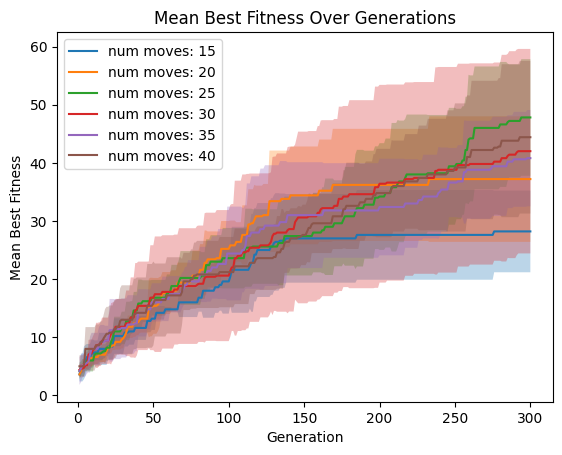

In [20]:
import matplotlib.pyplot as plt
import numpy as np

population_sizes = 100
board_size = 20
num_generations = 300
crossover_rate = 0.9
mutation_rate = 0.1
num_runs = 5
num_moves = [15, 20, 25, 30, 35, 40]

# Define lists to store the results for each population size
mean_best_fitness_values = []
std_best_fitness_values = []

# Define colors for each population size
colors = ['blue', 'orange', 'green', 'red']

# Loop over population sizes
for i, num_move in enumerate(num_moves):
    best_fitness_runs = []
    
    # Loop over runs
    for run in range(num_runs):
        best_fitness = []
        
        # Step 1: Initialization
        population = generate_individual(population_size, Horses[0][0], board_size=board_size, num_moves=num_move)  # TODO: Implement generate_individual function
        
        best_fitness_values = []
        worst_fitness_values = []
        average_fitness_values = []
        
        for generation in range(num_generations):
            scores = [fitness(SOLDIERS, Horses, individual) for individual in population]  # TODO: Implement fitness function
            
            best_score = max(scores)
            worst_score = min(scores)
            average_score = sum(scores) / len(scores)
            
            best_fitness_values.append(best_score)
            worst_fitness_values.append(worst_score)
            average_fitness_values.append(average_score)
            
            if best_score == BestFitness(SOLDIERS) or generation == 299:
                print("Best Solution",population[0])
                print(f"Run {run+1} - Generation {generation+1} - moves: {num_move} - Best Score: {best_score}")
                break
            
            parents = selection(population)  # TODO: Implement selection function
            
            random.shuffle(parents)
            
            paired_parents = []
            num_parents = len(parents)
            for i in range(0, num_parents, 2):
                if i + 1 < num_parents:
                    paired_parents.append([parents[i], parents[i + 1]])
                else:
                    paired_parents.append([parents[i]])
            
            offspring = []
            for pair in paired_parents:
                child1, child2 = crossover(pair[0], pair[1], crossover_rate)  # TODO: Implement crossover function
                offspring.append(child1)
                offspring.append(child2)
            
            for i in range(len(offspring)):
                offspring[i] = mutate(offspring[i], mutation_rate)  # TODO: Implement mutate function
            
            offspring_scores = [fitness(SOLDIERS, Horses, individual) for individual in offspring]  # TODO: Implement fitness function
            
            combined_population = population + offspring
            combined_scores = scores + offspring_scores
            
            sorted_indices = sorted(range(len(combined_scores)), key=lambda k: combined_scores[k], reverse=True)
            population = [combined_population[i] for i in sorted_indices[:population_size]]
            
            best_fitness.append(fitness(SOLDIERS, Horses, population[0]))  # TODO: Implement fitness function
        
        best_fitness.append(fitness(SOLDIERS, Horses, population[0]))  # TODO: Implement fitness function
        
        best_fitness_runs.append(best_fitness)
    

    best_fitness_runs = np.array(best_fitness_runs)
    
    # Calculate the mean and standard deviation over runs for the current population size
    mean_best_fitness = np.mean(best_fitness_runs, axis=0)
    std_best_fitness = np.std(best_fitness_runs, axis=0)
    
    mean_best_fitness_values.append(mean_best_fitness)
    std_best_fitness_values.append(std_best_fitness)

# Plot the mean fitness and standard deviation over generations for each population size
generations = range(1, num_generations + 1)

for i, num_move in enumerate(num_moves):
    mean_best_fitness = mean_best_fitness_values[i]
    std_best_fitness = std_best_fitness_values[i]

    plt.plot(generations, mean_best_fitness, label=f'num moves: {num_move}')
    plt.fill_between(generations, mean_best_fitness - std_best_fitness, mean_best_fitness + std_best_fitness, alpha=0.3)

plt.xlabel('Generation')
plt.ylabel('Mean Best Fitness')
plt.title('Mean Best Fitness Over Generations')
plt.legend()
plt.show()



# 2.h. for dal

Best Solution [(-1, -2), (-1, -2), (-2, -1), (2, 1), (2, -1), (2, -1), (1, 2), (-2, -1), (1, -2), (1, 2), (-1, -2), (-1, -2), (2, 1), (-1, -2), (-2, 1), (-1, 2), (-1, 2), (1, -2), (-1, -2), (1, 2), (-1, -2), (1, 2), (0, 0), (-2, 1), (1, -2), (-1, -2), (-2, 1), (-2, -1), (-2, -1), (-2, 1)]
Run 1 - Generation 300 - Population Size: 50 - Best Score: 16
Best Solution [(2, -1), (2, -1), (-1, -2), (-1, 2), (-2, 1), (-1, 2), (-2, -1), (-1, -2), (2, -1), (-1, -2), (2, 1), (2, 1), (1, -2), (-2, -1), (-1, -2), (1, 2), (1, 2), (1, -2), (-2, -1), (-1, 2), (-2, -1), (1, 2), (-1, -2), (-1, -2), (-2, 1), (-2, 1), (2, -1), (1, 2), (-1, -2), (1, 2)]
Run 2 - Generation 300 - Population Size: 50 - Best Score: 12
Best Solution [(1, -2), (-1, 2), (1, 2), (2, -1), (1, -2), (-1, 2), (1, -2), (-1, -2), (-2, -1), (-1, -2), (1, -2), (2, 1), (-2, 1), (-2, -1), (-1, -2), (1, 2), (2, 1), (-2, -1), (0, 0), (2, 1), (-1, 2), (0, 0), (1, -2), (-1, 2), (1, 2), (1, -2), (2, 1), (1, -2), (2, 1), (-2, 1)]
Run 3 - Generati

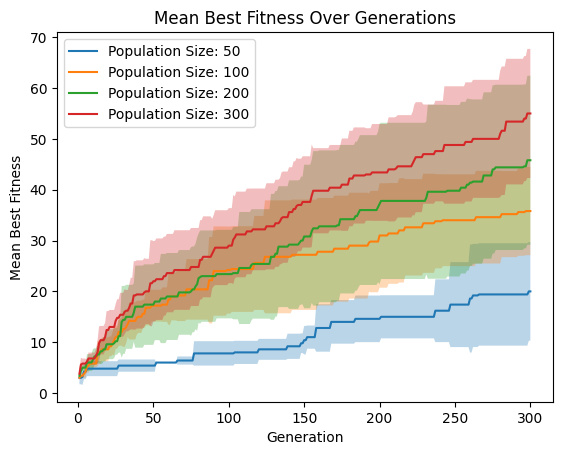

In [21]:
import matplotlib.pyplot as plt
import numpy as np

population_sizes = [50, 100, 200, 300]
board_size = 20
num_generations = 300
crossover_rate = 0.9
mutation_rate = 0.1
num_runs = 5

# Define lists to store the results for each population size
mean_best_fitness_values = []
std_best_fitness_values = []

# Define colors for each population size
colors = ['blue', 'orange', 'green', 'red']

# Loop over population sizes
for i, population_size in enumerate(population_sizes):
    best_fitness_runs = []
    
    # Loop over runs
    for run in range(num_runs):
        best_fitness = []
        
        # Step 1: Initialization
        population = generate_individual(population_size, Horses[0][0], board_size=board_size, num_moves=30)  # TODO: Implement generate_individual function
        
        best_fitness_values = []
        worst_fitness_values = []
        average_fitness_values = []
        
        for generation in range(num_generations):
            scores = [fitness(SOLDIERS, Horses, individual) for individual in population]  # TODO: Implement fitness function
            
            best_score = max(scores)
            worst_score = min(scores)
            average_score = sum(scores) / len(scores)
            
            best_fitness_values.append(best_score)
            worst_fitness_values.append(worst_score)
            average_fitness_values.append(average_score)
            
            if best_score == BestFitness(SOLDIERS) or generation == 299:
                print("Best Solution",population[0])
                print(f"Run {run+1} - Generation {generation+1} - Population Size: {population_size} - Best Score: {best_score}")
                break
            
            parents = selection(population)  # TODO: Implement selection function
            
            random.shuffle(parents)
            
            paired_parents = []
            num_parents = len(parents)
            for i in range(0, num_parents, 2):
                if i + 1 < num_parents:
                    paired_parents.append([parents[i], parents[i + 1]])
                else:
                    paired_parents.append([parents[i]])
            
            offspring = []
            for pair in paired_parents:
                child1, child2 = crossover(pair[0], pair[1], crossover_rate)  # TODO: Implement crossover function
                offspring.append(child1)
                offspring.append(child2)
            
            for i in range(len(offspring)):
                offspring[i] = mutate(offspring[i], mutation_rate)  # TODO: Implement mutate function
            
            offspring_scores = [fitness(SOLDIERS, Horses, individual) for individual in offspring]  # TODO: Implement fitness function
            
            combined_population = population + offspring
            combined_scores = scores + offspring_scores
            
            sorted_indices = sorted(range(len(combined_scores)), key=lambda k: combined_scores[k], reverse=True)
            population = [combined_population[i] for i in sorted_indices[:population_size]]
            
            best_fitness.append(fitness(SOLDIERS, Horses, population[0]))  # TODO: Implement fitness function
        
        best_fitness.append(fitness(SOLDIERS, Horses, population[0]))  # TODO: Implement fitness function
        
        best_fitness_runs.append(best_fitness)
    

    best_fitness_runs = np.array(best_fitness_runs)
    
    # Calculate the mean and standard deviation over runs for the current population size
    mean_best_fitness = np.mean(best_fitness_runs, axis=0)
    std_best_fitness = np.std(best_fitness_runs, axis=0)
    
    mean_best_fitness_values.append(mean_best_fitness)
    std_best_fitness_values.append(std_best_fitness)

# Plot the mean fitness and standard deviation over generations for each population size
generations = range(1, num_generations + 1)

for i, population_size in enumerate(population_sizes):
    mean_best_fitness = mean_best_fitness_values[i]
    std_best_fitness = std_best_fitness_values[i]

    plt.plot(generations, mean_best_fitness, label=f'Population Size: {population_size}')
    plt.fill_between(generations, mean_best_fitness - std_best_fitness, mean_best_fitness + std_best_fitness, alpha=0.3)

plt.xlabel('Generation')
plt.ylabel('Mean Best Fitness')
plt.title('Mean Best Fitness Over Generations')
plt.legend()
plt.show()



# 2.h. for he

Best Solution [(-1, -2), (1, -2), (1, -2), (1, -2), (-1, -2), (-2, -1), (-2, -1), (-2, 1), (1, 2), (-1, -2), (2, -1), (-2, 1), (1, 2), (-1, -2), (1, 2), (-1, -2), (2, -1), (-2, 1), (2, -1), (-2, 1), (1, 2), (0, 0), (-1, 2), (2, -1), (-2, 1), (-2, 1), (1, 2), (-2, -1), (-2, 1), (1, 2)]
Run 1 - Generation 300 - Crossover Rate: 0.5 - Best Score: 36
Best Solution [(-2, 1), (-2, -1), (1, 2), (1, 2), (1, -2), (-1, -2), (-1, -2), (1, -2), (-1, -2), (2, -1), (-1, -2), (1, 2), (-1, -2), (1, 2), (-1, -2), (1, 2), (2, 1), (-2, -1), (-1, -2), (1, 2), (0, 0), (-1, -2), (2, 1), (-2, 1), (1, -2), (1, -2), (-1, -2), (-2, -1), (-2, 1), (1, -2)]
Run 2 - Generation 300 - Crossover Rate: 0.5 - Best Score: 33
Best Solution [(1, 2), (1, -2), (2, -1), (2, 1), (-2, -1), (2, 1), (-2, -1), (2, 1), (-2, -1), (0, 0), (1, -2), (2, 1), (1, 2), (2, 1), (1, 2), (-1, 2), (0, 0), (-2, 1), (-2, 1), (2, 1), (-1, 2), (1, 2), (-2, -1), (1, 2), (-1, 2), (1, -2), (-1, 2), (-1, -2), (2, 1), (2, -1)]
Run 3 - Generation 300 - C

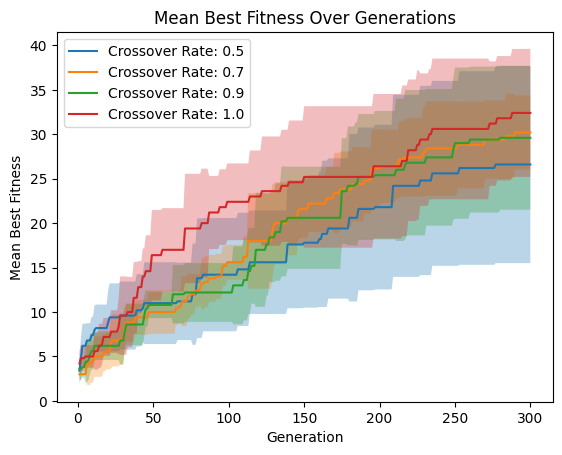

In [22]:
import matplotlib.pyplot as plt
import numpy as np

population_size = 100
board_size = 20
num_generations = 300
crossover_rates = [0.5, 0.7, 0.9, 1.0]  # Updated crossover rates
mutation_rate = 0.1
num_runs = 5

# Define lists to store the results for each crossover rate
mean_best_fitness_values = []
std_best_fitness_values = []

# Define colors for each crossover rate
colors = ['blue', 'orange', 'green', 'red']

# Loop over crossover rates
for i, crossover_rate in enumerate(crossover_rates):
    best_fitness_runs = []
    
    # Loop over runs
    for run in range(num_runs):
        best_fitness = []
        
        # Step 1: Initialization
        population = generate_individual(population_size, Horses[0][0], board_size=board_size, num_moves=30)  # TODO: Implement generate_individual function
        
        best_fitness_values = []
        worst_fitness_values = []
        average_fitness_values = []
        
        for generation in range(num_generations):
            scores = [fitness(SOLDIERS, Horses, individual) for individual in population]  # TODO: Implement fitness function
            
            best_score = max(scores)
            worst_score = min(scores)
            average_score = sum(scores) / len(scores)
            
            best_fitness_values.append(best_score)
            worst_fitness_values.append(worst_score)
            average_fitness_values.append(average_score)
            
            if best_score == BestFitness(SOLDIERS) or generation == 299:
                print("Best Solution",population[0])
                print(f"Run {run+1} - Generation {generation+1} - Crossover Rate: {crossover_rate} - Best Score: {best_score}")
                break
            
            parents = selection(population)  # TODO: Implement selection function
            
            random.shuffle(parents)
            
            paired_parents = []
            num_parents = len(parents)
            for i in range(0, num_parents, 2):
                if i + 1 < num_parents:
                    paired_parents.append([parents[i], parents[i + 1]])
                else:
                    paired_parents.append([parents[i]])
            
            offspring = []
            for pair in paired_parents:
                child1, child2 = crossover(pair[0], pair[1], crossover_rate)  # TODO: Implement crossover function
                offspring.append(child1)
                offspring.append(child2)
            
            for i in range(len(offspring)):
                offspring[i] = mutate(offspring[i], mutation_rate)  # TODO: Implement mutate function
            
            offspring_scores = [fitness(SOLDIERS, Horses, individual) for individual in offspring]  # TODO: Implement fitness function
            
            combined_population = population + offspring
            combined_scores = scores + offspring_scores
            
            sorted_indices = sorted(range(len(combined_scores)), key=lambda k: combined_scores[k], reverse=True)
            population = [combined_population[i] for i in sorted_indices[:population_size]]
            
            best_fitness.append(fitness(SOLDIERS, Horses, population[0]))  # TODO: Implement fitness function
        
        best_fitness.append(fitness(SOLDIERS, Horses, population[0]))  # TODO: Implement fitness function
        
        best_fitness_runs.append(best_fitness)
    

    best_fitness_runs = np.array(best_fitness_runs)
    
    # Calculate the mean and standard deviation over runs for the current crossover rate
    mean_best_fitness = np.mean(best_fitness_runs, axis=0)
    std_best_fitness = np.std(best_fitness_runs, axis=0)
    
    mean_best_fitness_values.append(mean_best_fitness)
    std_best_fitness_values.append(std_best_fitness)

# Plot the mean fitness and standard deviation over generations for each crossover rate
generations = range(1, num_generations + 1)

for i, crossover_rate in enumerate(crossover_rates):
    mean_best_fitness = mean_best_fitness_values[i]
    std_best_fitness = std_best_fitness_values[i]

    plt.plot(generations, mean_best_fitness, label=f'Crossover Rate: {crossover_rate}')
    plt.fill_between(generations, mean_best_fitness - std_best_fitness, mean_best_fitness + std_best_fitness, alpha=0.3)

plt.xlabel('Generation')
plt.ylabel('Mean Best Fitness')
plt.title('Mean Best Fitness Over Generations')
plt.legend()
plt.show()





# 2.h. for vav

Best Solution [(-1, 2), (2, 1), (2, -1), (-2, 1), (-1, -2), (2, 1), (-2, 1), (-2, 1), (2, -1), (-2, 1), (1, 2), (1, -2), (1, -2), (1, -2), (1, -2), (-1, -2), (-2, -1), (2, 1), (-2, -1), (-1, -2), (1, 2), (-1, -2), (1, 2), (0, 0), (-2, -1), (-1, 2), (2, -1), (-2, 1), (-2, -1), (1, 2)]
Run 1 - Generation 300 - Mutation Rate: 0.05 - Best Score: 24
Best Solution [(2, 1), (-1, -2), (-1, 2), (-1, -2), (-2, 1), (2, -1), (1, 2), (-1, -2), (1, 2), (-1, -2), (1, 2), (-1, -2), (1, 2), (-1, -2), (-2, 1), (2, -1), (1, 2), (-1, -2), (-2, 1), (2, -1), (-2, 1), (2, -1), (1, 2), (-1, -2), (1, 2), (0, 0), (2, 1), (-2, -1), (1, -2), (1, 2)]
Run 2 - Generation 300 - Mutation Rate: 0.05 - Best Score: 34
Best Solution [(1, -2), (1, -2), (-1, -2), (2, 1), (2, 1), (-2, 1), (-1, -2), (1, -2), (-2, 1), (-2, -1), (-1, -2), (1, 2), (2, 1), (-2, -1), (2, 1), (-2, -1), (-1, 2), (1, -2), (2, 1), (-2, -1), (0, 0), (-1, 2), (1, -2), (0, 0), (0, 0), (-1, 2), (1, -2), (0, 0), (1, -2), (-2, -1)]
Run 3 - Generation 300 - 

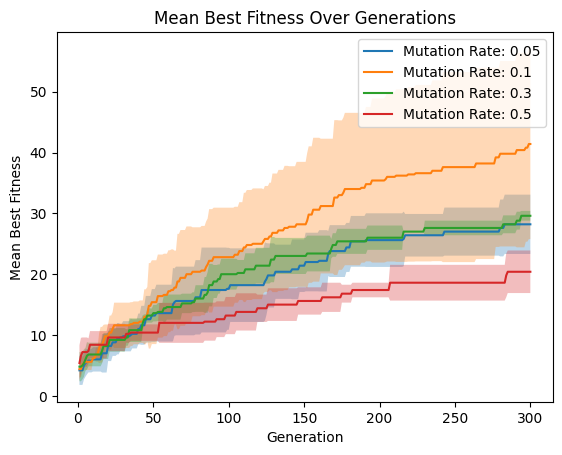

In [23]:
import matplotlib.pyplot as plt
import numpy as np

population_size = 200
board_size = 20
num_generations = 300
mutation_rates = [0.05, 0.1, 0.3, 0.5]
num_runs = 5

# Define lists to store the results for each mutation rate
mean_best_fitness_values = []
std_best_fitness_values = []

# Define colors for each mutation rate
colors = ['blue', 'orange', 'green', 'red']

# Loop over mutation rates
for i, mutation_rate in enumerate(mutation_rates):
    best_fitness_runs = []

    # Loop over runs
    for run in range(num_runs):
        best_fitness = []

        # Step 1: Initialization
        population = generate_individual(population_size, Horses[0][0], board_size=board_size, num_moves=30)  # TODO: Implement generate_individual function

        best_fitness_values = []
        worst_fitness_values = []
        average_fitness_values = []

        for generation in range(num_generations):
            scores = [fitness(SOLDIERS, Horses, individual) for individual in population]  # TODO: Implement fitness function

            best_score = max(scores)
            worst_score = min(scores)
            average_score = sum(scores) / len(scores)

            best_fitness_values.append(best_score)
            worst_fitness_values.append(worst_score)
            average_fitness_values.append(average_score)

            if best_score == BestFitness(SOLDIERS) or generation == 299:
                print("Best Solution", population[0])
                print(f"Run {run+1} - Generation {generation+1} - Mutation Rate: {mutation_rate} - Best Score: {best_score}")
                break

            parents = selection(population)  # TODO: Implement selection function

            random.shuffle(parents)

            paired_parents = []
            num_parents = len(parents)
            for i in range(0, num_parents, 2):
                if i + 1 < num_parents:
                    paired_parents.append([parents[i], parents[i + 1]])
                else:
                    paired_parents.append([parents[i]])

            offspring = []
            for pair in paired_parents:
                child1, child2 = crossover(pair[0], pair[1], crossover_rate)  # TODO: Implement crossover function
                offspring.append(child1)
                offspring.append(child2)

            for i in range(len(offspring)):
                offspring[i] = mutate(offspring[i], mutation_rate)  # TODO: Implement mutate function

            offspring_scores = [fitness(SOLDIERS, Horses, individual) for individual in offspring]  # TODO: Implement fitness function

            combined_population = population + offspring
            combined_scores = scores + offspring_scores

            sorted_indices = sorted(range(len(combined_scores)), key=lambda k: combined_scores[k], reverse=True)
            population = [combined_population[i] for i in sorted_indices[:population_size]]

            best_fitness.append(fitness(SOLDIERS, Horses, population[0]))  # TODO: Implement fitness function

        best_fitness.append(fitness(SOLDIERS, Horses, population[0]))  # TODO: Implement fitness function

        best_fitness_runs.append(best_fitness)

    best_fitness_runs = np.array(best_fitness_runs)

    # Calculate the mean and standard deviation over runs for the current mutation rate
    mean_best_fitness = np.mean(best_fitness_runs, axis=0)
    std_best_fitness = np.std(best_fitness_runs, axis=0)

    mean_best_fitness_values.append(mean_best_fitness)
    std_best_fitness_values.append(std_best_fitness)

# Plot the mean fitness and standard deviation over generations for each mutation rate
generations = range(1, num_generations + 1)

for i, mutation_rate in enumerate(mutation_rates):
    mean_best_fitness = mean_best_fitness_values[i]
    std_best_fitness = std_best_fitness_values[i]

    plt.plot(generations, mean_best_fitness, label=f'Mutation Rate: {mutation_rate}')
    plt.fill_between(generations, mean_best_fitness - std_best_fitness, mean_best_fitness + std_best_fitness, alpha=0.3)

plt.xlabel('Generation')
plt.ylabel('Mean Best Fitness')
plt.title('Mean Best Fitness Over Generations')
plt.legend()
plt.show()
